In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("data/raw.csv")
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611


In [3]:
df.shape

(1264, 13)

In [4]:
df.isna().sum()

Manufacturer                  0
Model Name                    0
Category                      0
Screen Size                   0
Screen                        0
CPU                           0
RAM                           0
Storage                       0
GPU                           0
Operating System              0
Operating System Version    136
Weight                        0
Price                         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264 entries, 0 to 1263
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Manufacturer              1264 non-null   object
 1   Model Name                1264 non-null   object
 2   Category                  1264 non-null   object
 3   Screen Size               1264 non-null   object
 4   Screen                    1264 non-null   object
 5   CPU                       1264 non-null   object
 6   RAM                       1264 non-null   object
 7   Storage                   1264 non-null   object
 8   GPU                       1264 non-null   object
 9   Operating System          1264 non-null   object
 10  Operating System Version  1128 non-null   object
 11  Weight                    1264 non-null   object
 12  Price                     1264 non-null   int64 
dtypes: int64(1), object(12)
memory usage: 128.5+ KB


In [6]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [7]:
df.duplicated().sum()

24

In [8]:
df.describe()

,Price
count,1.264000e+03
mean,1.012844e+07
std,6.236219e+06
min,1.706375e+06
25%,5.490143e+06
50%,8.794188e+06
75%,1.332911e+07
max,5.423231e+07


In [9]:
df=df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

In [11]:
print(df["Operating System"].unique())
print(df["Operating System Version"].unique())


['macOS' 'No OS' 'Windows' 'Mac OS' 'Linux' 'Android' 'Chrome OS']
[nan '10' 'X' '10 S' '7']


In [12]:
df.shape

(1240, 13)

In [13]:
(df["Operating System Version"].isnull().sum()/1240)*100

10.967741935483872

In [14]:
df.shape

(1240, 13)

In [15]:
df['Screen Size'] = df['Screen Size'].str.replace('"', '').astype(float)
df['RAM'] = df['RAM'].str.replace('GB', '').astype('int64')
df['Storage'] = df['Storage'].str.extract('(\d+)').astype('int64')
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)

In [16]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,NaN,1.37,11912523
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,NaN,1.34,7993374
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,NaN,1.86,5112900
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,NaN,1.83,22563005
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,NaN,1.37,16037611


In [17]:
df = df.drop(columns=['CPU'])
df = df.drop(columns=['GPU'])
df = df.drop(columns=['Operating System Version'])

In [18]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,RAM,Storage,Operating System,Weight,Price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128,macOS,1.37,11912523
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,128,macOS,1.34,7993374
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,256,No OS,1.86,5112900
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512,macOS,1.83,22563005
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256,macOS,1.37,16037611


In [19]:
df['Screen'] = df['Screen'].astype(str)

# Extract Screen Name
df['Screen Name'] = df['Screen'].apply(lambda x: x.split(' ')[0:-1])

# Extract Screen Resolution
df['Screen Resolution'] = df['Screen'].apply(lambda x: x.split(' ')[-1])

In [20]:
df.drop(columns=["Screen"],inplace=True)
df.head()

,Manufacturer,Model Name,Category,Screen Size,RAM,Storage,Operating System,Weight,Price,Screen Name,Screen Resolution
0,Apple,MacBook Pro,Ultrabook,13.3,8,128,macOS,1.37,11912523,"[IPS, Panel, Retina, Display]",2560x1600
1,Apple,Macbook Air,Ultrabook,13.3,8,128,macOS,1.34,7993374,[],1440x900
2,HP,250 G6,Notebook,15.6,8,256,No OS,1.86,5112900,"[Full, HD]",1920x1080
3,Apple,MacBook Pro,Ultrabook,15.4,16,512,macOS,1.83,22563005,"[IPS, Panel, Retina, Display]",2880x1800
4,Apple,MacBook Pro,Ultrabook,13.3,8,256,macOS,1.37,16037611,"[IPS, Panel, Retina, Display]",2560x1600


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1240 entries, 0 to 1239
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Manufacturer       1240 non-null   object 
 1   Model Name         1240 non-null   object 
 2   Category           1240 non-null   object 
 3   Screen Size        1240 non-null   float64
 4   RAM                1240 non-null   int64  
 5   Storage            1240 non-null   int64  
 6   Operating System   1240 non-null   object 
 7   Weight             1240 non-null   float64
 8   Price              1240 non-null   int64  
 9   Screen Name        1240 non-null   object 
 10  Screen Resolution  1240 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 116.2+ KB


In [22]:
def multiply_resolution(resolution):
    width, height = map(int, resolution.split('x'))
    return width * height

df['Resolution Product'] = df['Screen Resolution'].apply(multiply_resolution)

In [23]:
df.drop(columns="Screen Resolution",inplace=True)
df.head()

,Manufacturer,Model Name,Category,Screen Size,RAM,Storage,Operating System,Weight,Price,Screen Name,Resolution Product
0,Apple,MacBook Pro,Ultrabook,13.3,8,128,macOS,1.37,11912523,"[IPS, Panel, Retina, Display]",4096000
1,Apple,Macbook Air,Ultrabook,13.3,8,128,macOS,1.34,7993374,[],1296000
2,HP,250 G6,Notebook,15.6,8,256,No OS,1.86,5112900,"[Full, HD]",2073600
3,Apple,MacBook Pro,Ultrabook,15.4,16,512,macOS,1.83,22563005,"[IPS, Panel, Retina, Display]",5184000
4,Apple,MacBook Pro,Ultrabook,13.3,8,256,macOS,1.37,16037611,"[IPS, Panel, Retina, Display]",4096000


In [24]:
df['Screen Name'] = df['Screen Name'].apply(lambda x: ' '.join(x))
df.head()

,Manufacturer,Model Name,Category,Screen Size,RAM,Storage,Operating System,Weight,Price,Screen Name,Resolution Product
0,Apple,MacBook Pro,Ultrabook,13.3,8,128,macOS,1.37,11912523,IPS Panel Retina Display,4096000
1,Apple,Macbook Air,Ultrabook,13.3,8,128,macOS,1.34,7993374,,1296000
2,HP,250 G6,Notebook,15.6,8,256,No OS,1.86,5112900,Full HD,2073600
3,Apple,MacBook Pro,Ultrabook,15.4,16,512,macOS,1.83,22563005,IPS Panel Retina Display,5184000
4,Apple,MacBook Pro,Ultrabook,13.3,8,256,macOS,1.37,16037611,IPS Panel Retina Display,4096000


In [25]:
df['Screen Name'] = df['Screen Name'].replace('', np.nan)

null_values = df['Screen Name'].isnull().sum()

print("Number of null values in 'Screen Name':", null_values)

Number of null values in 'Screen Name': 275


In [26]:
print(df["Manufacturer"].nunique())
print("------------------------------------")
print(df["Model Name"].nunique())
print("------------------------------------")
print(df["Category"].nunique())
print("------------------------------------")
print(df["Operating System"].nunique())
print("------------------------------------")
print(df["Screen Name"].nunique())

19
------------------------------------
603
------------------------------------
6
------------------------------------
7
------------------------------------
20


In [27]:

df['Screen Name'] = df['Screen Name'].replace('', np.nan)
df['Screen Name'] = df.groupby('Manufacturer')['Screen Name'].ffill().bfill()
df.head(10)

,Manufacturer,Model Name,Category,Screen Size,RAM,Storage,Operating System,Weight,Price,Screen Name,Resolution Product
0,Apple,MacBook Pro,Ultrabook,13.3,8,128,macOS,1.37,11912523,IPS Panel Retina Display,4096000
1,Apple,Macbook Air,Ultrabook,13.3,8,128,macOS,1.34,7993374,IPS Panel Retina Display,1296000
2,HP,250 G6,Notebook,15.6,8,256,No OS,1.86,5112900,Full HD,2073600
3,Apple,MacBook Pro,Ultrabook,15.4,16,512,macOS,1.83,22563005,IPS Panel Retina Display,5184000
4,Apple,MacBook Pro,Ultrabook,13.3,8,256,macOS,1.37,16037611,IPS Panel Retina Display,4096000
5,Acer,Aspire 3,Notebook,15.6,4,500,Windows,2.10,3556800,IPS Panel Retina Display,1049088
6,Apple,MacBook Pro,Ultrabook,15.4,16,256,Mac OS,2.04,19028613,IPS Panel Retina Display,5184000
7,Apple,Macbook Air,Ultrabook,13.3,8,256,macOS,1.34,10303160,IPS Panel Retina Display,1296000
8,Asus,ZenBook UX430UN,Ultrabook,14.0,16,512,Windows,1.30,13293540,Full HD,2073600
9,Acer,Swift 3,Ultrabook,14.0,8,256,Windows,1.60,6846840,IPS Panel Full HD,2073600


In [28]:
df.isnull().sum()

Manufacturer          0
Model Name            0
Category              0
Screen Size           0
RAM                   0
Storage               0
Operating System      0
Weight                0
Price                 0
Screen Name           0
Resolution Product    0
dtype: int64

In [29]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df, title="Laptop Data Profiling Report", explorative=True)
# profile.to_file("laptop_data_profiling_report.html")


Shape of your Data Set loaded: (1240, 11)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  4
    Number of String-Categorical Columns =  4
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    11 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
There are 1 dup

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Manufacturer,object,0.000000,1,,,11 rare categories: Too many to list. Group them into a single category or drop the categories.
Model Name,object,0.000000,48,,,Possible high cardinality column with 603 unique values: Use hash encoding or text embedding to reduce dimension.
Category,object,0.000000,0,,,No issue
Screen Size,float64,0.000000,NA,10.100000,18.400000,Column has 33 outliers greater than upper bound (18.00) or lower than lower bound(11.60). Cap them or remove them.
RAM,int64,0.000000,0,2.000000,64.000000,Column has 217 outliers greater than upper bound (14.00) or lower than lower bound(-2.00). Cap them or remove them.
Storage,int64,0.000000,0,1.000000,512.000000,No issue
Operating System,object,0.000000,0,,,"2 rare categories: ['Mac OS', 'Android']. Group them into a single category or drop the categories."
Weight,float64,0.000000,NA,0.690000,4.700000,"Column has 44 outliers greater than upper bound (3.53) or lower than lower bound(0.28). Cap them or remove them., Column has a high correlation with ['Screen Size']. Consider dropping one of them."
Price,int64,0.000000,62,1706375.000000,54232308.000000,Column has 30 outliers greater than upper bound (24983519.25) or lower than lower bound(-6094910.75). Cap them or remove them.
Screen Name,object,0.000000,1,,,13 rare categories: Too many to list. Group them into a single category or drop the categories.


Number of All Scatter Plots = 3


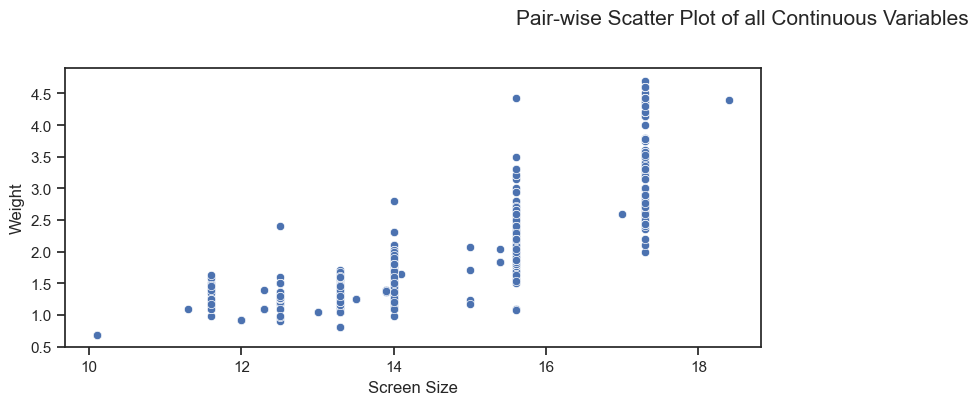

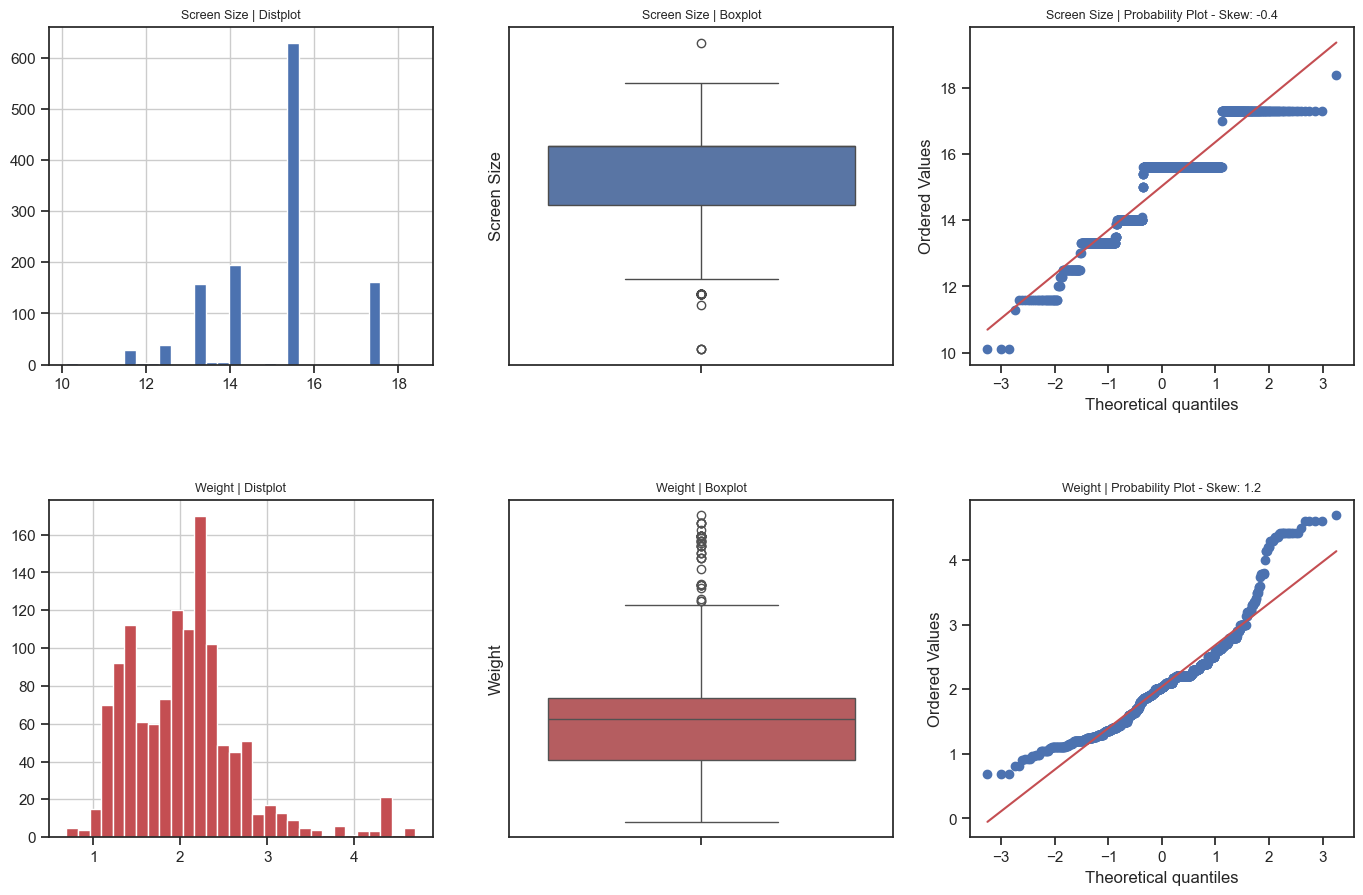

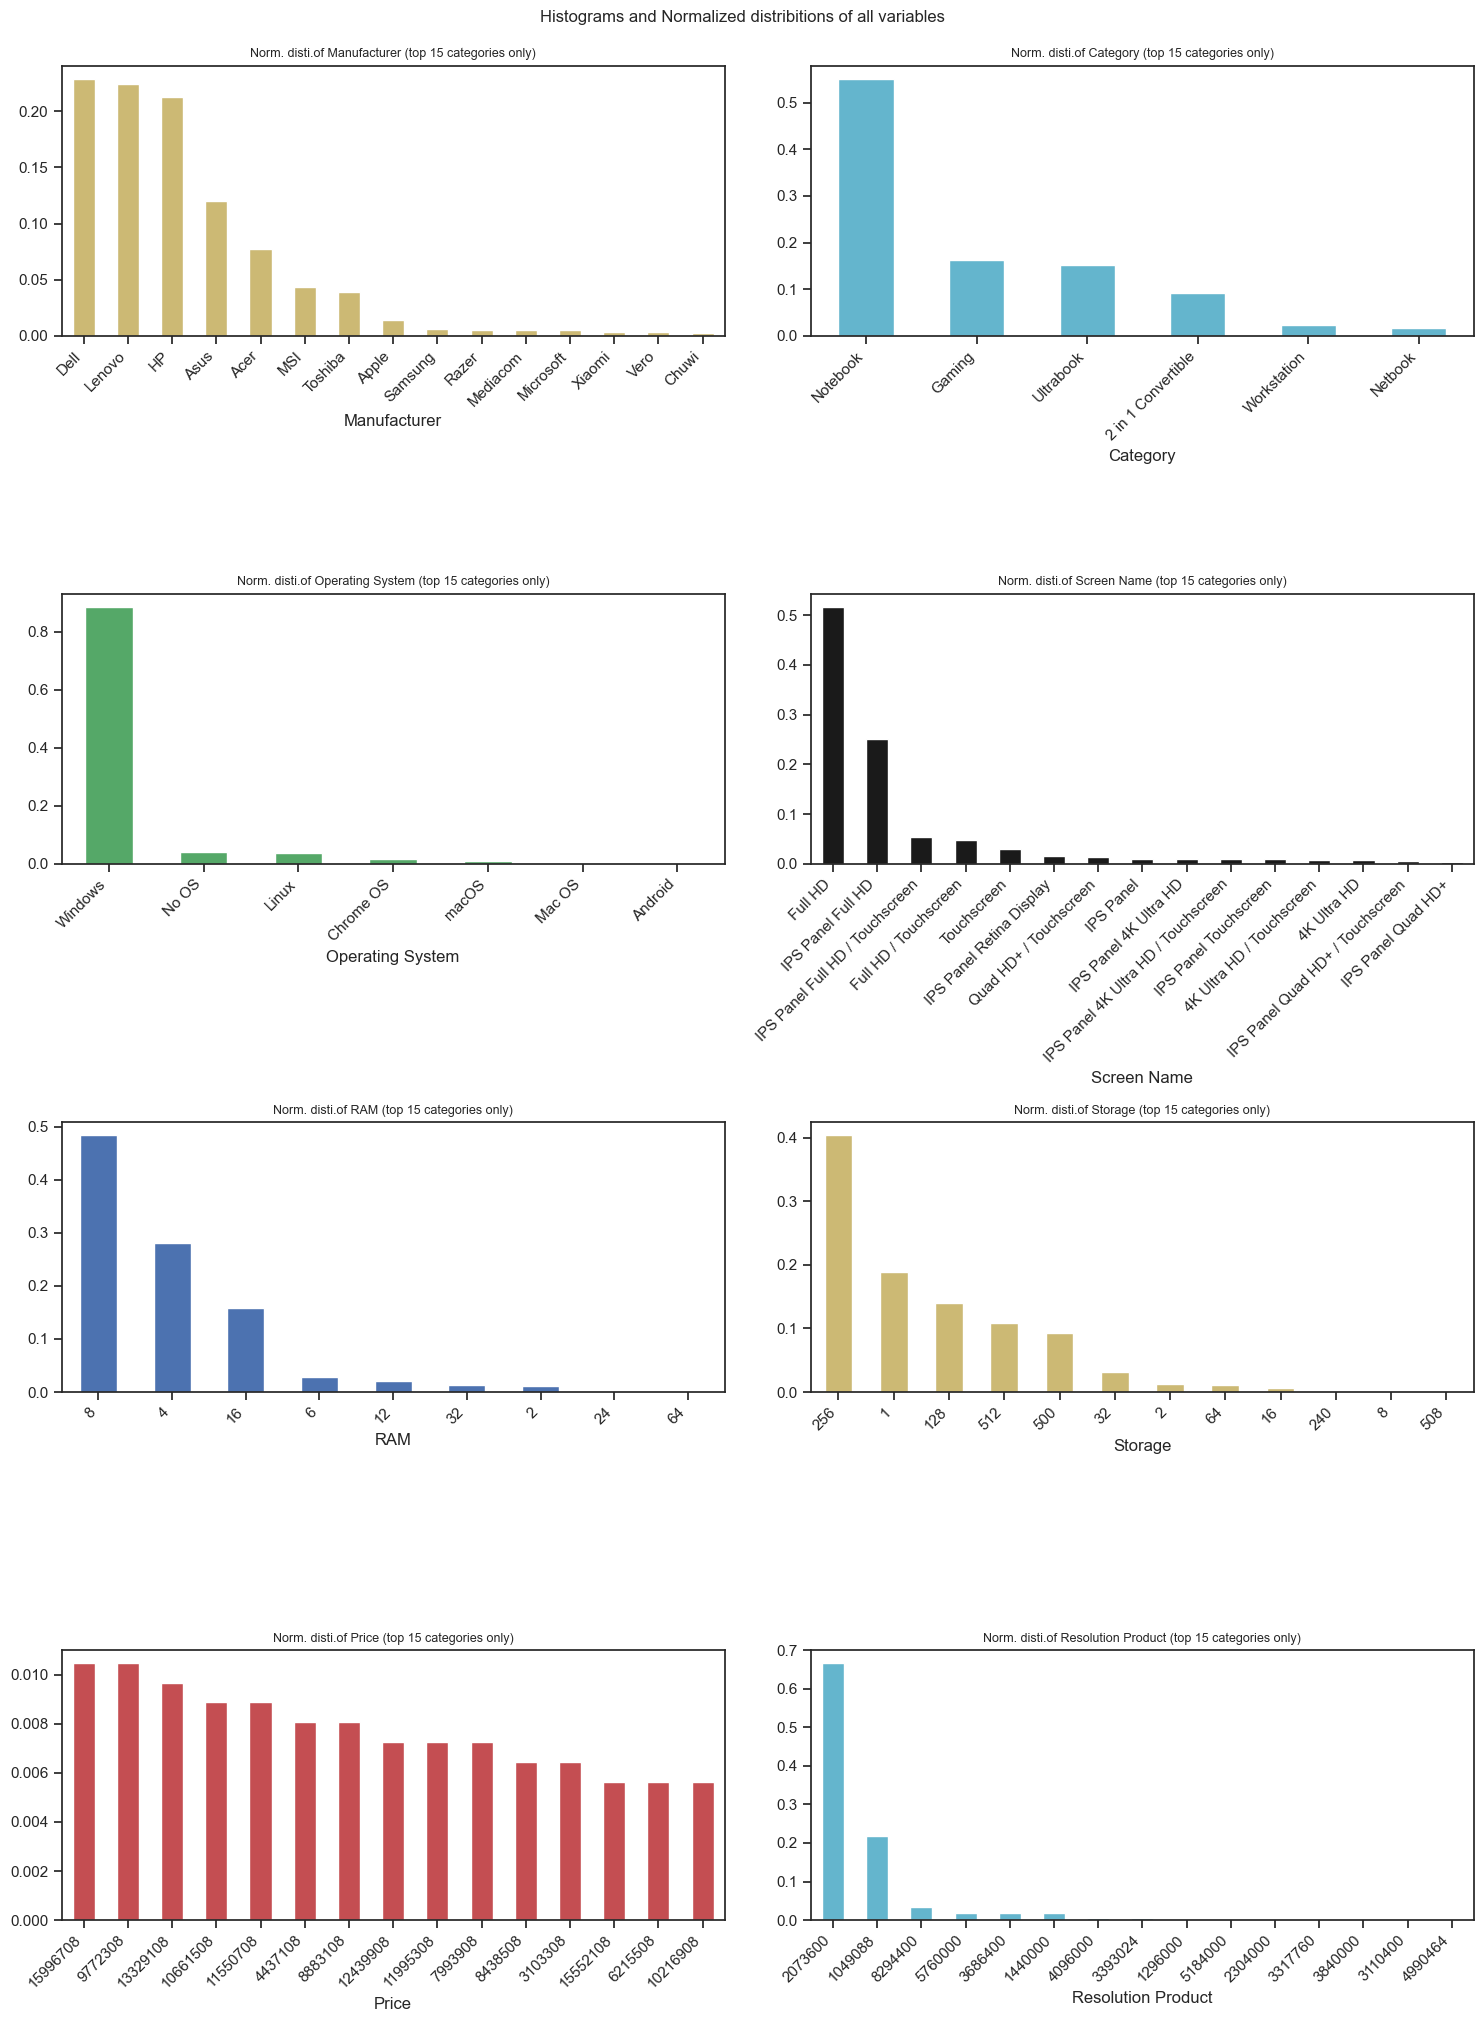

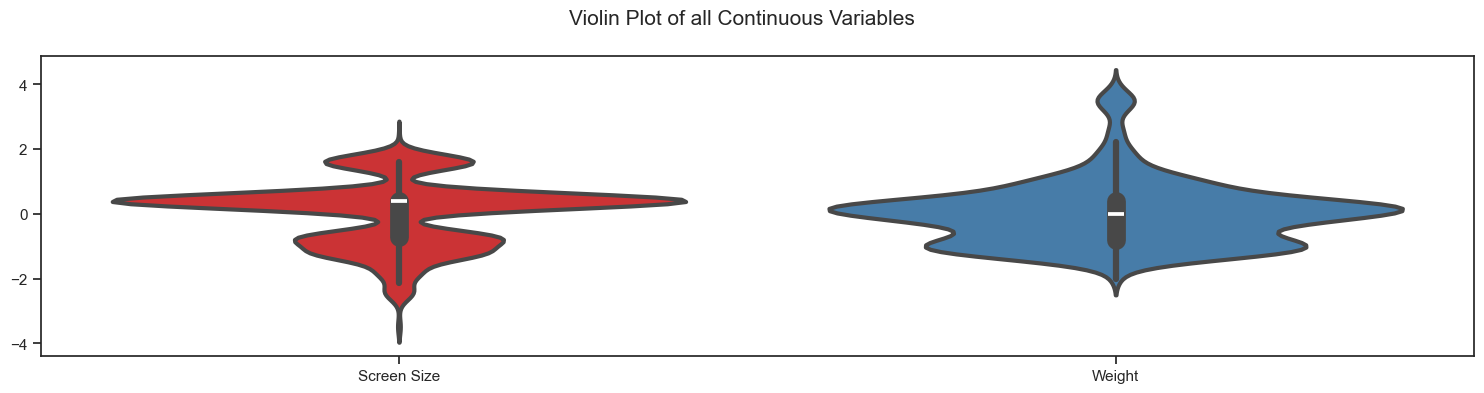

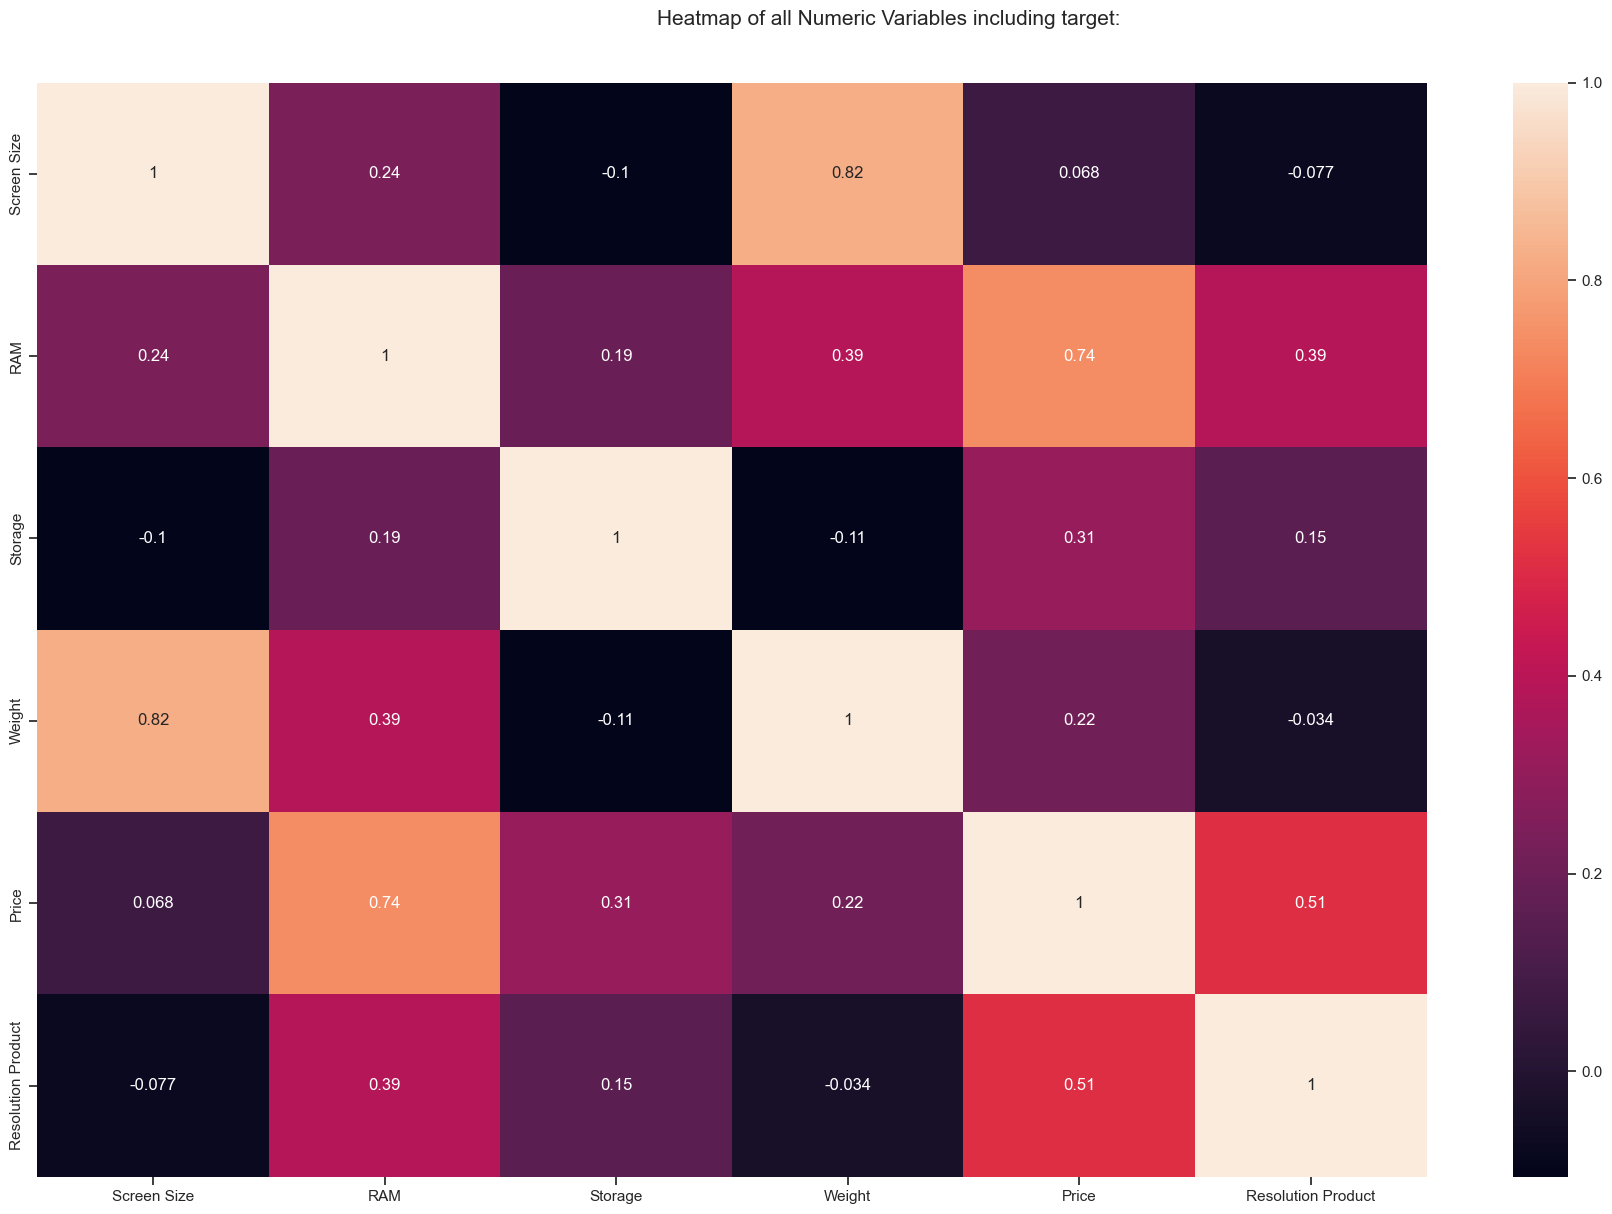

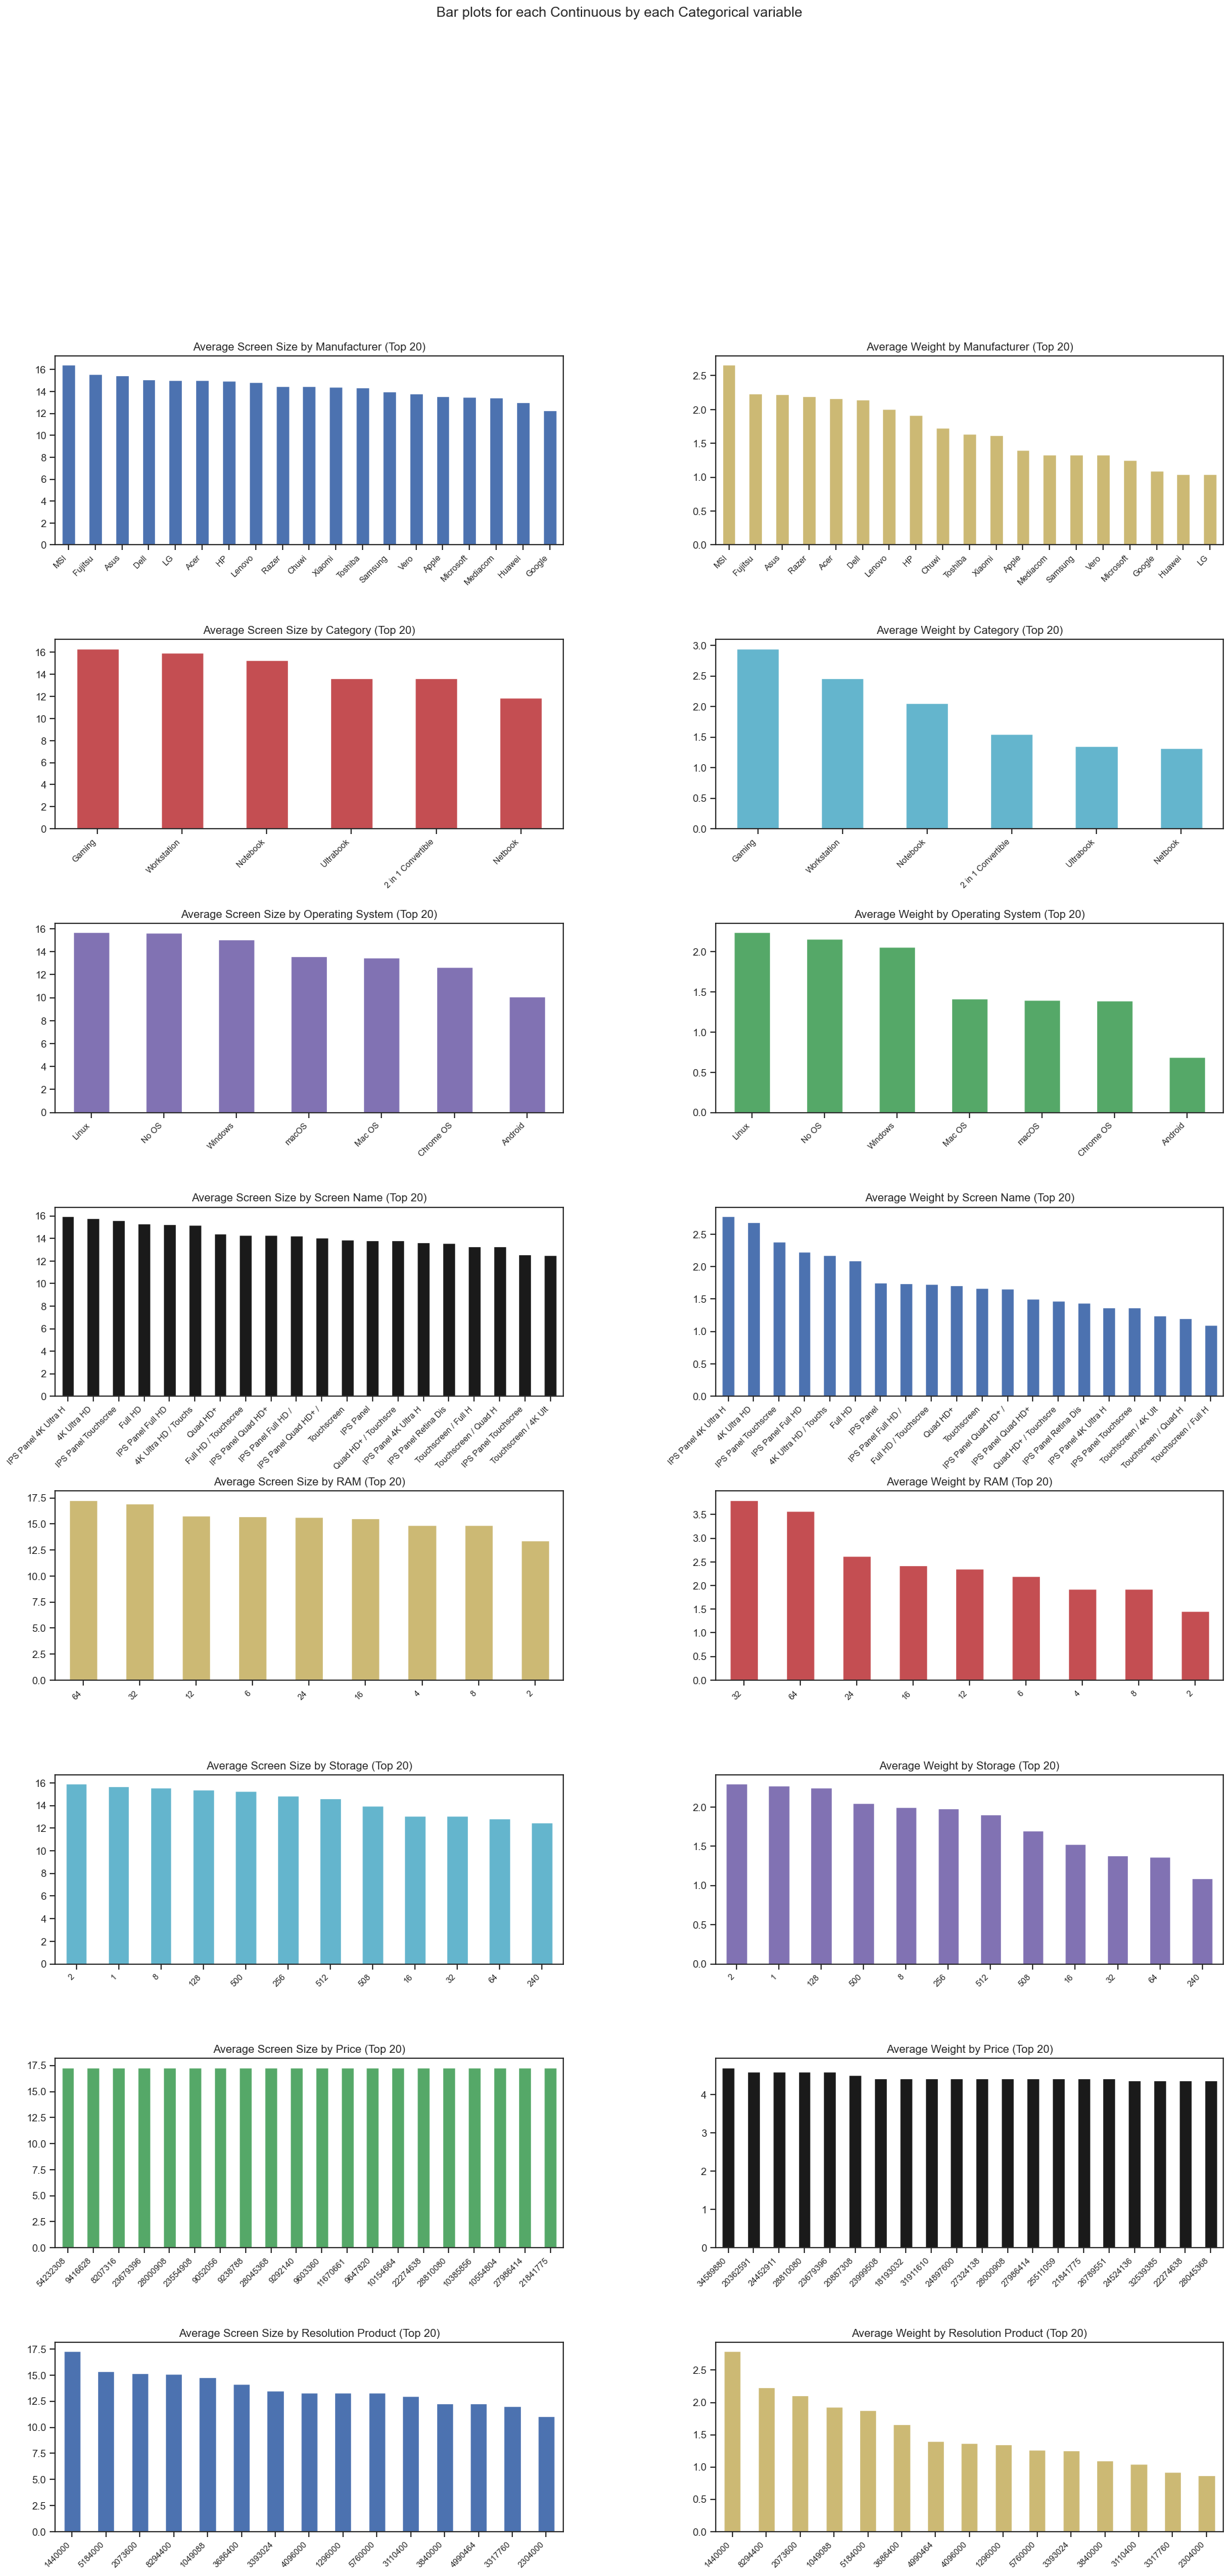

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\DELL-2023\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\DELL-2023\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\DELL-2023\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\DELL-2023\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\DELL-2023\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_revie

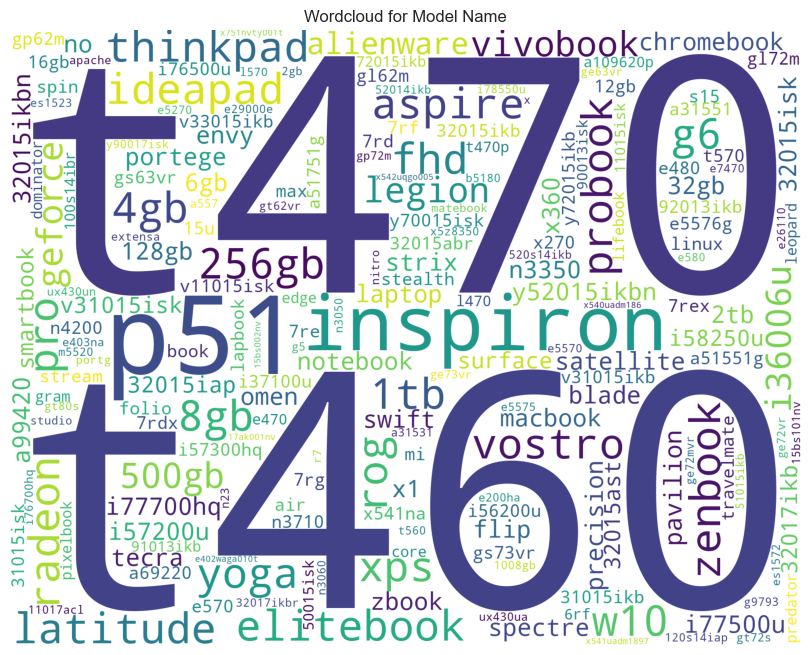

All Plots done
Time to run AutoViz = 25 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,Manufacturer,Model Name,Category,Screen Size,RAM,Storage,Operating System,Weight,Price,Screen Name,Resolution Product
0,Apple,MacBook Pro,Ultrabook,13.3,8,128,macOS,1.37,11912523,IPS Panel Retina Display,4096000
1,Apple,Macbook Air,Ultrabook,13.3,8,128,macOS,1.34,7993374,IPS Panel Retina Display,1296000
2,HP,250 G6,Notebook,15.6,8,256,No OS,1.86,5112900,Full HD,2073600
3,Apple,MacBook Pro,Ultrabook,15.4,16,512,macOS,1.83,22563005,IPS Panel Retina Display,5184000
4,Apple,MacBook Pro,Ultrabook,13.3,8,256,macOS,1.37,16037611,IPS Panel Retina Display,4096000
...,...,...,...,...,...,...,...,...,...,...,...
1235,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,128,Windows,1.80,5673096,IPS Panel Full HD / Touchscreen,2073600
1236,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,512,Windows,1.30,13329108,IPS Panel Quad HD+ / Touchscreen,5760000
1237,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,64,Windows,1.50,2036268,IPS Panel Quad HD+ / Touchscreen,1049088
1238,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,1,Windows,2.19,6793488,Full HD,1049088


In [37]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
%matplotlib inline
AV.AutoViz(filename="", dfte=df, chart_format="svg", max_rows_analyzed=1500, max_cols_analyzed=30)